In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'html5'
from mpl_toolkits.basemap import Basemap
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')

In [2]:
csv_file = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df = pd.read_csv(csv_file)

In [3]:
defined_list = ['Hawaii', 'Alaska', 'American Samoa', 'Diamond Princess', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'District of Columbia','Virgin Islands']
def isin(x):
    return x not in defined_list
states_df = df[df.Province_State.apply(isin)]
states_df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,357,364,367,369,394,405,425,428,436,447
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,364,368,374,377,386,398,405,415,422,435
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,234,237,244,250,262,265,271,271,276,279
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,104,108,113,115,118,123,123,124,126,132
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,110,114,119,121,127,136,140,146,150,156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,75,77,79,81,81,89,96,102,110,114
3257,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,29,29,29,29,30,31,31,31,31,31
3258,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,806,827,855,889,919,974,1031,1056,1104,1151
3259,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,30,30,31,33,33,38,38,38,39,39


In [4]:
states_df[states_df.Lat == states_df.Lat.min()]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20
3147,84080001,US,USA,840,80001.0,Out of AL,Alabama,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3149,84080004,US,USA,840,80004.0,Out of AZ,Arizona,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3150,84080005,US,USA,840,80005.0,Out of AR,Arkansas,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3151,84080006,US,USA,840,80006.0,Out of CA,California,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3152,84080008,US,USA,840,80008.0,Out of CO,Colorado,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3247,84090054,US,USA,840,90054.0,Unassigned,West Virginia,US,0.0,0.0,...,0,1,1,0,0,0,0,0,1,2
3248,84090055,US,USA,840,90055.0,Unassigned,Wisconsin,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3249,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3253,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.0,0.0,...,4130,4059,4058,4067,4072,4078,4085,4083,4084,4097


In [5]:
latlon = """Wisconsin, the USA	44.500000	-89.500000
West Virginia, the US	39.000000	-80.500000
Vermont, the USA	44.000000	-72.699997
Texas, the USA	31.000000	-100.000000
South Dakota, the US	44.500000	-100.000000
Rhode Island, the US	41.700001	-71.500000
Oregon, the US	44.000000	-120.500000
New York, the US	43.000000	-75.000000
New Hampshire, the US	44.000000	-71.500000
Nebraska, the US	41.500000	-100.000000
Kansas, the US	38.500000	-98.000000
Mississippi, the US	33.000000	-90.000000
Illinois, the US	40.000000	-89.000000
Delaware, the US	39.000000	-75.500000
Connecticut, the US	41.599998	-72.699997
Arkansas, the US	34.799999	-92.199997
Indiana, USA	40.273502	-86.126976
Missouri State, USA	38.573936	-92.603760
Florida, USA	27.994402	-81.760254
Nevada, USA	39.876019	-117.224121
Maine, the USA	45.367584	-68.972168
Michigan, USA	44.182205	-84.506836
Georgia, the USA	33.247875	-83.441162
Hawaii, USA	19.741755	-155.844437
Alaska, USA	66.160507	-153.369141
Tennessee, USA	35.860119	-86.660156
Virginia, USA	37.926868	-78.024902
New Jersey, USA	39.833851	-74.871826
Kentucky, USA	37.839333	-84.270020
North Dakota, USA	47.650589	-100.437012
Minnesota, USA	46.392410	-94.636230
Oklahoma, the USA	36.084621	-96.921387
Montana, USA	46.965260	-109.533691
Washington State, the USA	47.751076	-120.740135
Utah, USA	39.419220	-111.950684
Colorado, USA	39.113014	-105.358887
Ohio, USA	40.367474	-82.996216
Alabama, USA	32.318230	-86.902298
Iowa, the USA	42.032974	-93.581543
New Mexico, USA	34.307144	-106.018066
South Carolina, USA	33.836082	-81.163727
Pennsylvania, USA	41.203323	-77.194527
Arizona, USA	34.048927	-111.093735
Maryland, USA	39.045753	-76.641273
Massachusetts, USA	42.407211	-71.382439
California, the USA	36.778259	-119.417931
Idaho, USA	44.068203	-114.742043
Wyoming, USA	43.075970	-107.290283
North Carolina, USA	35.782169	-80.793457
Louisiana, USA	30.391830	-92.329102"""

In [6]:
lat_lon_dict = {}
for info in latlon.split('\n'):
    state, lat, lon = info.split('\t')
    state = state.split(',')[0]
    lat = float(lat)
    lon = float(lon)
    lat_lon_dict[state] = (lat, lon)

In [7]:
lat_lon_df = pd.DataFrame(lat_lon_dict).T
lat_lon_df.columns = ['Lat', 'Lon']
lat_lon_df = lat_lon_df[(np.array(lat_lon_df.index) != 'Hawaii') & (np.array(lat_lon_df.index) != 'Alaska')]
lat_lon_df.sort_index(inplace=True)

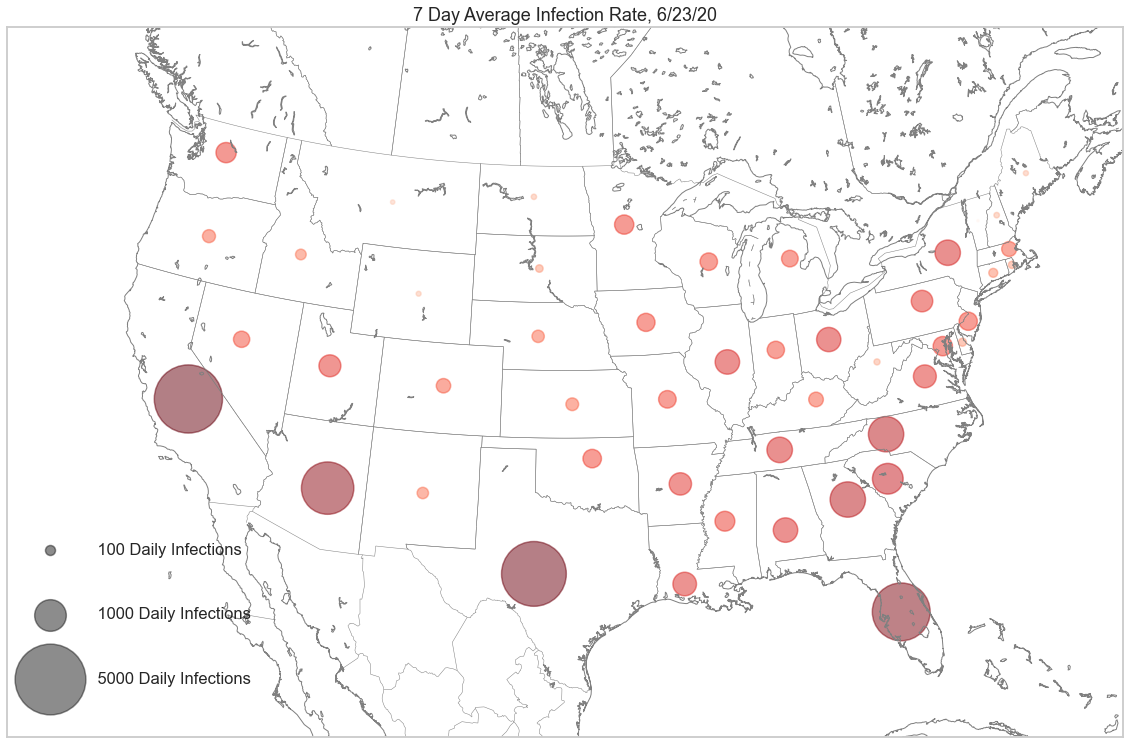

In [8]:
lat_lon_df.min(), lat_lon_df.max()
fig = plt.figure(figsize=(20, 15))
m = Basemap(projection='lcc', resolution='i',
            width=5.5E6, height=3.5E6, 
            lat_0=39.5, lon_0=-98.4,)

m.drawstates(color='gray')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

small_df =  states_df.groupby('Province_State').sum().iloc[:,40:].diff(7, axis=1)/7
m.scatter(lat_lon_df.Lon.values, lat_lon_df.Lat.values, latlon=True,
          c=np.log10(small_df.iloc[:,-1].values), s=small_df.iloc[:,-1].values,
          cmap='Reds', alpha=0.5)

for a in [100,1000, 5000]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label="    "+str(a) + ' Daily Infections')
plt.legend(scatterpoints=1,
           frameon=False,
           labelspacing=3,
           loc='lower left',
           bbox_to_anchor=(0.01,0.05))
plt.title(f'7 Day Average Infection Rate, {small_df.columns[-1]}')
fig.savefig('recent-map.pdf', dpi=120, bbox_inches='tight')

In [10]:
def make_map(i):
    ax.clear()
    m = Basemap(projection='lcc', resolution='i',
                width=5.5E6, height=3.5E6, 
                lat_0=39.5, lon_0=-98.4)

    m.drawstates(color='gray')
    m.drawcoastlines(color='gray')
    m.drawcountries(color='gray')

    small_df =  states_df.groupby('Province_State').sum().iloc[:,40:].diff(7, axis=1)/7
    m.scatter(lat_lon_df.Lon.values, lat_lon_df.Lat.values, latlon=True,
              c=np.log10(small_df.iloc[:,i].values), s=small_df.iloc[:,i].values,
              cmap='Reds', alpha=0.5,)
    ax.set_title(f'7 Day Average Infection Rate, {small_df.columns[i]}')
    fig.canvas.draw()


    for a in [100,1000, 5000]:
        plt.scatter([], [], c='k', alpha=0.5, s=a,
                    label="    "+str(a) + ' Daily Infections')
    plt.legend(scatterpoints=1,
               frameon=False,
               labelspacing=3,
               loc='lower left',
               bbox_to_anchor=(0.01,0.05))
    plt.tight_layout()
    return fig,

<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/nathan/anaconda3/envs/tdi_env/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/nathan/anaconda3/envs/tdi_env/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/nathan/anaconda3/envs/tdi_env/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/Users/nathan/anaconda3/envs/tdi_env/lib/python3.7/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: conver

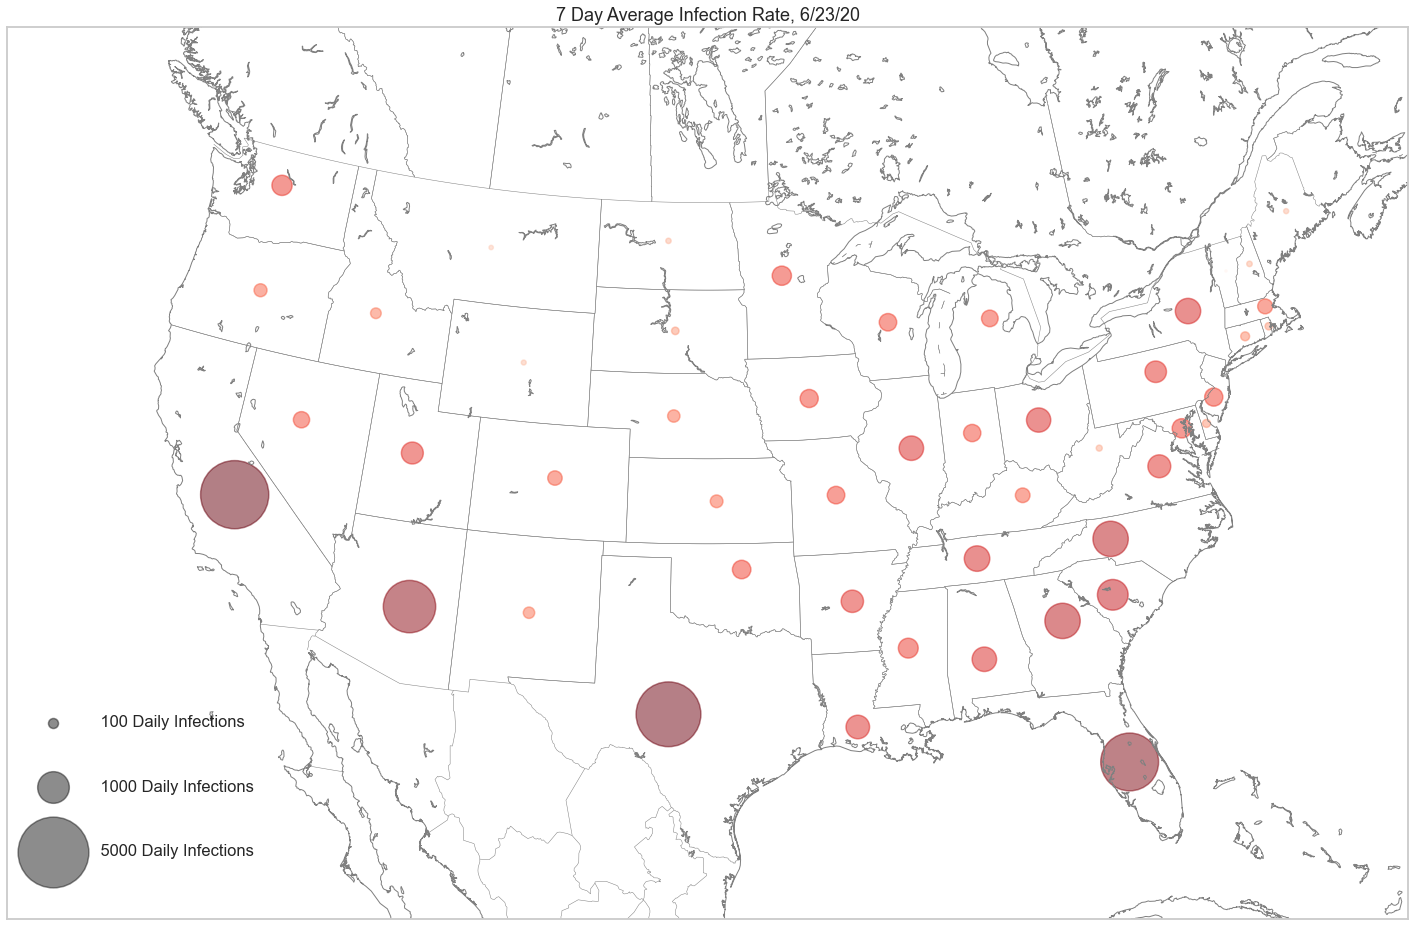

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
anim = FuncAnimation(fig, make_map, frames=np.arange(0, small_df.shape[1]), interval=200, blit=True)
with open('animation.html', 'w') as f:
    f.write(anim.to_html5_video())

In [ ]:
anim